## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [6]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
decay = 0.005
Dropout_EXP = [0.25, 0.3, 0.5]

In [22]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drop_exp in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop_exp)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, decay=decay)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    results[drop_exp] = {'train_loss':model.history.history["loss"]
            , 'valid_loss':model.history.history["val_loss"]
            , 'train_acc':model.history.history["acc"]
            , 'valid_acc':model.history.history["val_acc"]
            }

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 16s 328us/step - loss: 1.4990 - acc: 0.4630 - val_loss: 1.4417 - val_acc: 0.4847
Epoch 50/50
50000/50000 [==============================] - 16s 316us/step - loss: 1.4965 - acc: 0.4665 - val_loss: 1.4380 - val_acc: 0.4853
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
______

50000/50000 [==============================] - 16s 323us/step - loss: 1.5633 - acc: 0.4411 - val_loss: 1.4766 - val_acc: 0.4783
Epoch 48/50
50000/50000 [==============================] - 16s 327us/step - loss: 1.5567 - acc: 0.4437 - val_loss: 1.4754 - val_acc: 0.4795
Epoch 49/50
50000/50000 [==============================] - 16s 323us/step - loss: 1.5576 - acc: 0.4423 - val_loss: 1.4724 - val_acc: 0.4770
Epoch 50/50
50000/50000 [==============================] - 16s 317us/step - loss: 1.5546 - acc: 0.4450 - val_loss: 1.4710 - val_acc: 0.4812
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0

50000/50000 [==============================] - 19s 382us/step - loss: 1.8370 - acc: 0.3182 - val_loss: 1.7860 - val_acc: 0.3829
Epoch 46/50
50000/50000 [==============================] - 21s 415us/step - loss: 1.8327 - acc: 0.3195 - val_loss: 1.7848 - val_acc: 0.3833
Epoch 47/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.8358 - acc: 0.3179 - val_loss: 1.7846 - val_acc: 0.3874
Epoch 48/50
50000/50000 [==============================] - 21s 428us/step - loss: 1.8323 - acc: 0.3202 - val_loss: 1.7819 - val_acc: 0.3811
Epoch 49/50
50000/50000 [==============================] - 20s 394us/step - loss: 1.8326 - acc: 0.3185 - val_loss: 1.7793 - val_acc: 0.3855
Epoch 50/50
50000/50000 [==============================] - 20s 400us/step - loss: 1.8304 - acc: 0.3201 - val_loss: 1.7763 - val_acc: 0.3858


0 0.25
1 0.3
2 0.5


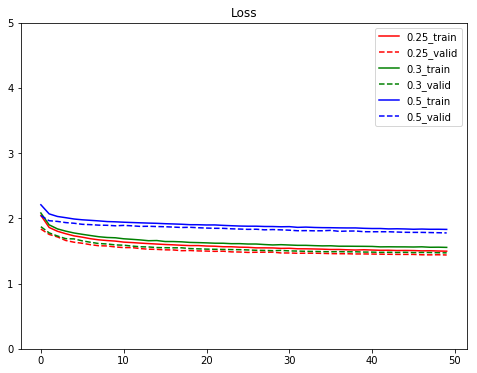

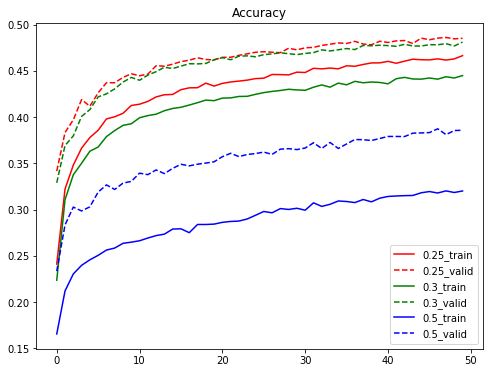

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    print(i, cond)
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=str(cond)+'_train', color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=str(cond)+'_valid', color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=str(cond)+'_train', color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=str(cond)+'_valid', color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()